# 逻辑回归（Logistic Regression）

逻辑回归是除了军事和安全领域之外，使用最多的机器学习算法

逻辑回归：解决分类问题
在逻辑回归中，我们得到的数值是一个概率值，如果预测的概率值大于0.5的话，y的预测值为1，反之为0

![](img/isea47.jpg)

逻辑回归本身只能解决二分类问题，但是我们可以进行一定的改进，使得逻辑回归能够支持多分类问题。KNN天生的就可以支持多分类的问题。

我们将得到的数值作为一个特征值输入到sigmod的函数中，经过sigmod函数的转换，转换为一个值域在[0，1]之间的值。

![](img/isea48.jpg)

* $\theta$ 是一个列向量 和 $x_{b}$ 是一个行向量，二者相乘，就会得到多项式

我们将$\theta^{T}\cdot X_b$作为$\sigma$函数的输入

### Sigmod函数

![](img/isea49.jpg)

该曲线的值域在零一之间 ，下面绘制该图像

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

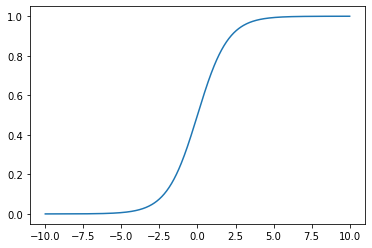

In [3]:
x = np.linspace(-10,10,500)
y = sigmoid(x)

plt.plot(x,y)

#### 特点

![](img/isea50.jpg)

可以发现sigmod函数的值域在[0,1]之间，概率的范围也在[0,1]之间，完美契合

**逻辑回归**
![](img/isea51.jpg)

这里我们想要在一个模型拟合样本数据集，在线性回归中使用MSE来判断拟合的好坏，但是逻辑回归不可以这样做。  

### 逻辑回归的损失函数

每一个样本对应的损失
$cost = -ylog(\hat{p}) - (1 - y)log(1 - \hat{p})$

* y是真实的分类（0或者是1）
* $\hat{p}$ 是样本估计的概率


#### 逻辑回归整体的损失函数：

* $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)} log(\hat{p}^{(i)}) + (1 - y^{(i)}) log(1-\hat{p}^{(i)}) $

* $\hat{p}^{(i)} = \sigma(X_{b}^{(i)}\theta) = \frac{1}{1 + e^{-X_{b}^{(i)}\theta}}$

* 这里的$X_{b}^{(i)}$ 是添加了全为1的一列

将上述的两个公式进行合并

$J(\theta) = -\frac{1}{m} \sum_{i = 1}^{m}y^{(i)} log(\sigma{(X_{b}^{(i)}\theta)}) + (1-y_{(i)})log(1-\sigma{(X_b^{(i)}\theta)}) $

这里真正的未知数是$\theta$

上述的目标函数，没有公式解，可以使用梯度下降法来求解！！而且该函数是凸函数，所以存在全局最优解。

#### 梯度下降法求解逻辑回归的目标函数

![](img/logic-regression/logic100.png)

### 实现逻辑回归


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X = X[y<2,:2]
y = y[y<2]

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

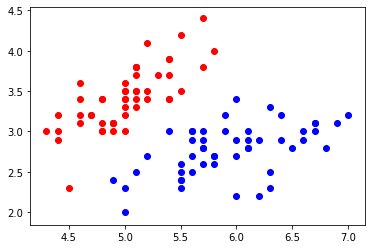

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6666)

In [11]:
from machineLearning.LG import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# 测试一下我们分类的结果
log_reg.score(X_test, y_test)

1.0

可以发现我们分类的数据都是正确的。

对于X_trest中的每一个数据相应的都有一个概率值，这个概率值越接近于1，逻辑回归模型越愿意将我们的样本分类成1，越是接近于0，相应的我们的逻辑回归算法会将样本分类为0。

In [13]:
log_reg.predict_proba(X_test)

array([0.86867169, 0.99633233, 0.03166216, 0.98513611, 0.19512764,
       0.02599912, 0.96442693, 0.16565554, 0.9782039 , 0.06775895,
       0.93650974, 0.16565554, 0.90846593, 0.72951837, 0.01764368,
       0.14024494, 0.78417207, 0.93669883, 0.97334889, 0.99102464,
       0.97058706, 0.0563509 , 0.98532149, 0.87981825, 0.13986139])

In [14]:
log_reg.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0])

In [15]:
y_test


array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0])

我们这里实现的逻辑回归算法，改自于线性，在线性回归算法中的一些参数，逻辑回归都有。

In [16]:
log_reg.coef_

array([ 3.01151272, -5.00857237])

In [17]:
log_reg.intercept_

-0.8465737231582576

## 决策边界

![](img/logic-regression/lg1.png)

这里$\theta^{T}\cdot{x_{b}} =0$ 是两个向量进行点乘，其实也表示的是一个直线。

如果$X$ 有两个特征，上述的公式就可以写成：

$\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} = 0$  这是一个直线的表达式，在坐标系中横轴是$x_1$这个特征，纵轴是$x_2$这个特征，我们的将公示转化一下：

$x_2 = \frac{-\theta_0 - \theta_{1}x_1}{\theta_2}$

在下面的公式中：
* log_reg.intercept_ 就是 $\theta_{0}$
* log_reg.coef_[0] 就是$\theta_{1}$ 依次类推

In [18]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [19]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

根据x1_plot 和x2_plot来绘制决策边界

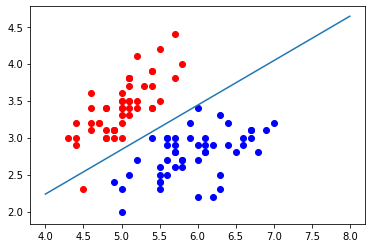

In [20]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

#### 决策边界的几何意义

如果我们新来一个样本，这个样本中的每一个特征和当前的$\theta$ 相乘，如果大于等于0，我们就将其分类为1，也即如果在当前的直线的下面，我们就将其分类为1，这就是几何意义。  

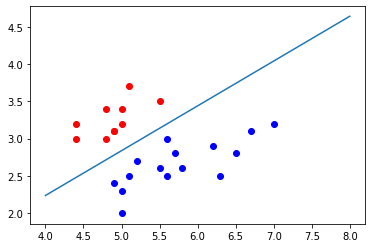

In [21]:
# 在上面的图中，有一个红色的点在下方，这个红色的点是在测试数据集中。
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

对于逻辑回归算法来说，它得到的决策边界其实就是一根直线，非常的简单，所以它本身还是线性回归算法中的一种，分类的本质是对于一个点来说是在这根直线的上面还是下面。如果是上面对应的就分为一类，如果是线面就分为另外一类。

我们可以对KNN或者是逻辑回归，我们开假如多项式项，使得其决策边界不再是一个直线，这种情况我们就无法求出直线的方程来把这个直线画出来，我们需要一个绘制不规则的决策边界的方法，如下： 

我们将坐标轴中的所有平面都分成无数个点，对于每一个点都是用模型来判断当前的点被分成哪一类，然后将不同的颜色绘制出来，得到的结果就是决策边界

![](img/logic-regression/lg2.png)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


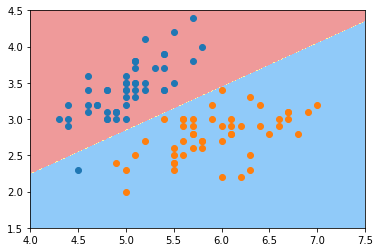

In [22]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        # axis[1]-axis[0] x的右边界减去左边界
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # 对于所有的点都进行一个预测
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    # 进行一个绘制
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### kNN的决策边界

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
knn_clf.score(X_test, y_test)

1.0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


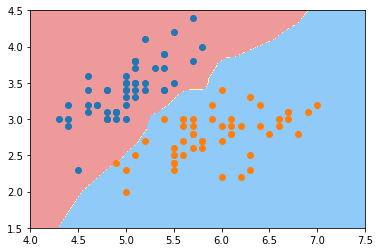

In [25]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

可以发现此时的决策边界是一个曲线。

KNN天然的可以解决多分类问题，具体来看一下对于多分类问题的决策边界的绘制

In [26]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


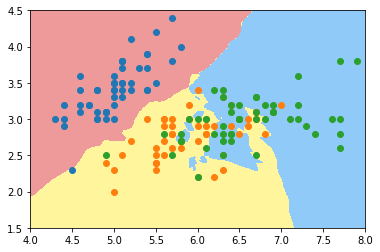

In [27]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()


k = 5 ，在KNN中k值越小，模型也就越复杂；可以发现上述的例子中有些过拟合了。我们得到的决策边界非常的不规整。

#### 设置k = 50 来防止过拟合

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


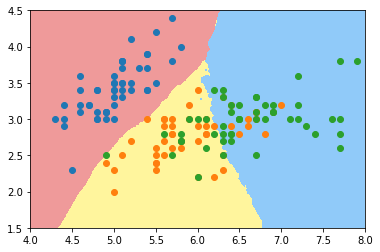

In [28]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

对于KNN来说，模型的复杂程度意味着决策边界的不同。

### 在逻辑回归中使用多项式特征

对于样本点非线性的分布，如果非线性的数据进行比较好的分类。
![](img/logic-regression/lg3.jpg)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))

# 这里是一个布尔类型，需要进行类型转换
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')

In [30]:
X[:2]

array([[0.82418808, 0.479966  ],
       [1.17346801, 0.90904807]])

In [31]:
y[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

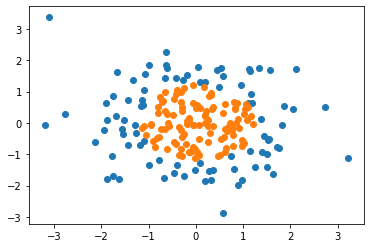

In [32]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 使用逻辑回归添加多项式项目，对以上的样本进行划分

In [33]:
from machineLearning.LG import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [34]:
# 直接就使用训练数集进行打分
log_reg.score(X, y)

0.505

绘制决策边界

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


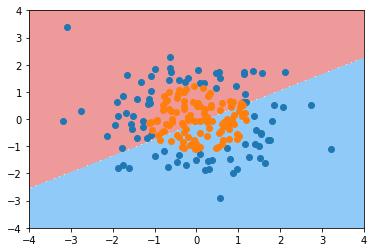

In [35]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

由于我们实现的逻辑回归使用的是一个直线做为决策边界对特征平面进行划分，显然在这里有很多错误的分类，导致最终得到的分类准确度很低。

使用pipeline来实现：

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        # 添加多项式项
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        # 这里的逻辑回归，是我们自己实现的，其能够无缝插入管道中，是因为->下面写
        ('log_reg', LogisticRegression())
    ])

这里的逻辑回归，是我们自己实现的，其能够无缝插入管道中，是因为这里逻辑回归的实现是按照sklearnd的标准实现的，有构造函数、有fit函数、有predict函数、要有score函数等等。

In [37]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [38]:
poly_log_reg.score(X, y)

0.95

可以发现，在给逻辑回归添加了多项式项之后，分类的准确度提高了很多；

画出决策边界

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


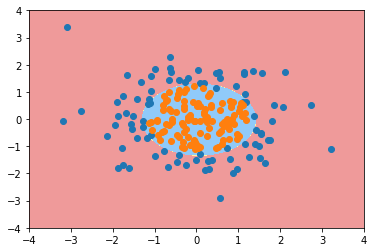

In [39]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

在实际的情形中，上图的形状不一定是圆形，所以要选取适度的degree。

假设这里选取20，就会发生过拟合：

In [40]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)   

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


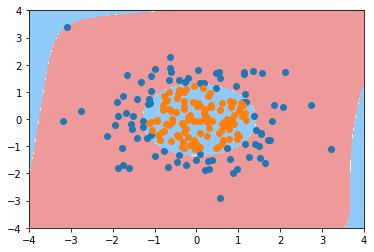

In [41]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 在逻辑回归中使用正则化

正则化是为了防止过拟合，在损失函数的基础上加上正则化项，来代表示模型复杂度。

新的目标函数 = $J(\theta) + \alpha{L_{2}}$
* 这里的$\alpha$ 用来调节前后两部分重要的程度

新的引入正则化 C

$C\cdot J(\theta) + L_1$ 
$C\cdot J(\theta) + L_2$ 
* 这里的$C$ 是一个和 $\alpha$一样的效果

在我们的模型比较复杂的时候，都应该添加正则化来防止过拟合产生。

### sklearn中的逻辑回归

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1


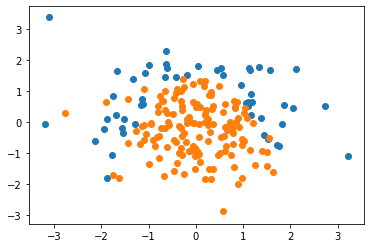

In [43]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [45]:
# 逻辑回归释然是属于一种线性的模型
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* penalty='l2' 表示这里表示默认使用的是'l2'的正则项，来进行模型的正则化
* C = 1 表示默认的超参数为1

In [46]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [47]:
log_reg.score(X_test, y_test)

0.86

上面的打分结果并不是很高，由于我们使用线性的模型去拟合非线性的数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


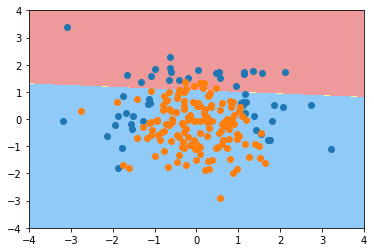

In [48]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [50]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [51]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [52]:
poly_log_reg.score(X_test, y_test)

0.94

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


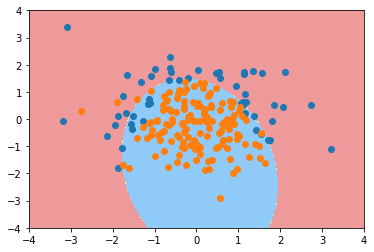

In [53]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### degree = 20

In [54]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [55]:
poly_log_reg2.score(X_train, y_train)

0.94

In [56]:
poly_log_reg2.score(X_test, y_test)

0.92

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


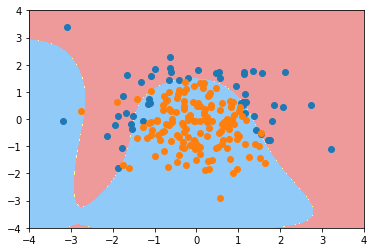

In [57]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

很有可能，就已经发生了过拟合

#### 传入degree、C两个参数

In [61]:

def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [62]:
poly_log_reg3.score(X_train, y_train)

0.8533333333333334

In [64]:
poly_log_reg3.score(X_test, y_test)

0.92

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


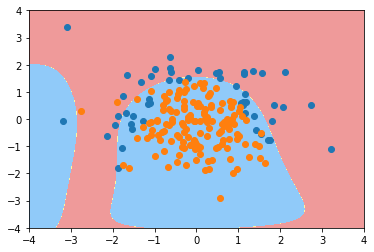

In [65]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 尝试使用$l_1$正则项

这种正则项，可以使得degree=20的时候，很多的$x^{i}$前面的系数为0，使得决策边界不会弯弯曲曲。

In [66]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])

poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [67]:
poly_log_reg4.score(X_train, y_train)

0.8266666666666667

In [68]:
poly_log_reg4.score(X_test, y_test)

0.9

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


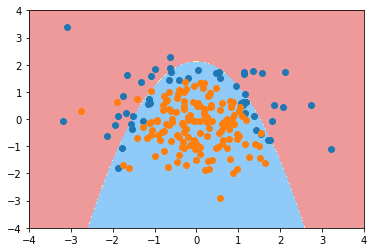

In [69]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

我们可以使用网格搜索的方式来寻找对于当前样本，使用的最优的超参数。